In [1]:
# Install the latest Tensorflow version.
!pip install --quiet "tensorflow>=1.7"
# Install TF-Hub.
!pip install --quiet tensorflow-hub
!pip install --quiet seaborn

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

W0514 14:29:37.640175  5476 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


In [3]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/2" #@param ["https://tfhub.dev/google/universal-sentence-encoder/2", "https://tfhub.dev/google/universal-sentence-encoder-large/3"]

In [14]:
dfpath = pd.read_csv(r'C:\Users\Y\Documents\MILA\ACL_Workshop_Gender_Bias_NLP\datasets\gutenberg\plotting_test_gutenberg_order.csv')
dfpath2 = pd.read_csv(r'C:\Users\Y\Documents\MILA\ACL_Workshop_Gender_Bias_NLP\datasets\gutenberg\plotting_test_gutenberg.csv')
df_path3 = pd.read_csv(r'C:\Users\Y\Documents\MILA\test_200.csv', encoding = "ISO-8859-1")
df_path4 = pd.read_csv(r'C:\Users\Y\Documents\MILA\test_200_order.csv', encoding = "ISO-8859-1")

In [10]:
# Import the Universal Sentence Encoder's TF Hub module
embed = hub.Module(module_url)

In [11]:
def plot_similarity(labels, features, rotation):
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    plt.figure(figsize=(20, 20))
    g = sns.heatmap(
          corr,
          #xticklabels=labels,
          #yticklabels=labels,
          vmin=0,
          vmax=1,
          cmap="YlOrRd")
    #g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")


def run_and_plot(session_, input_tensor_, messages_, encoding_tensor):
    message_embeddings_ = session_.run(
    encoding_tensor, feed_dict={input_tensor_: messages_})
    plot_similarity(messages_, message_embeddings_, 90)

In [28]:
sentences = dfpath['sentence'].tolist()

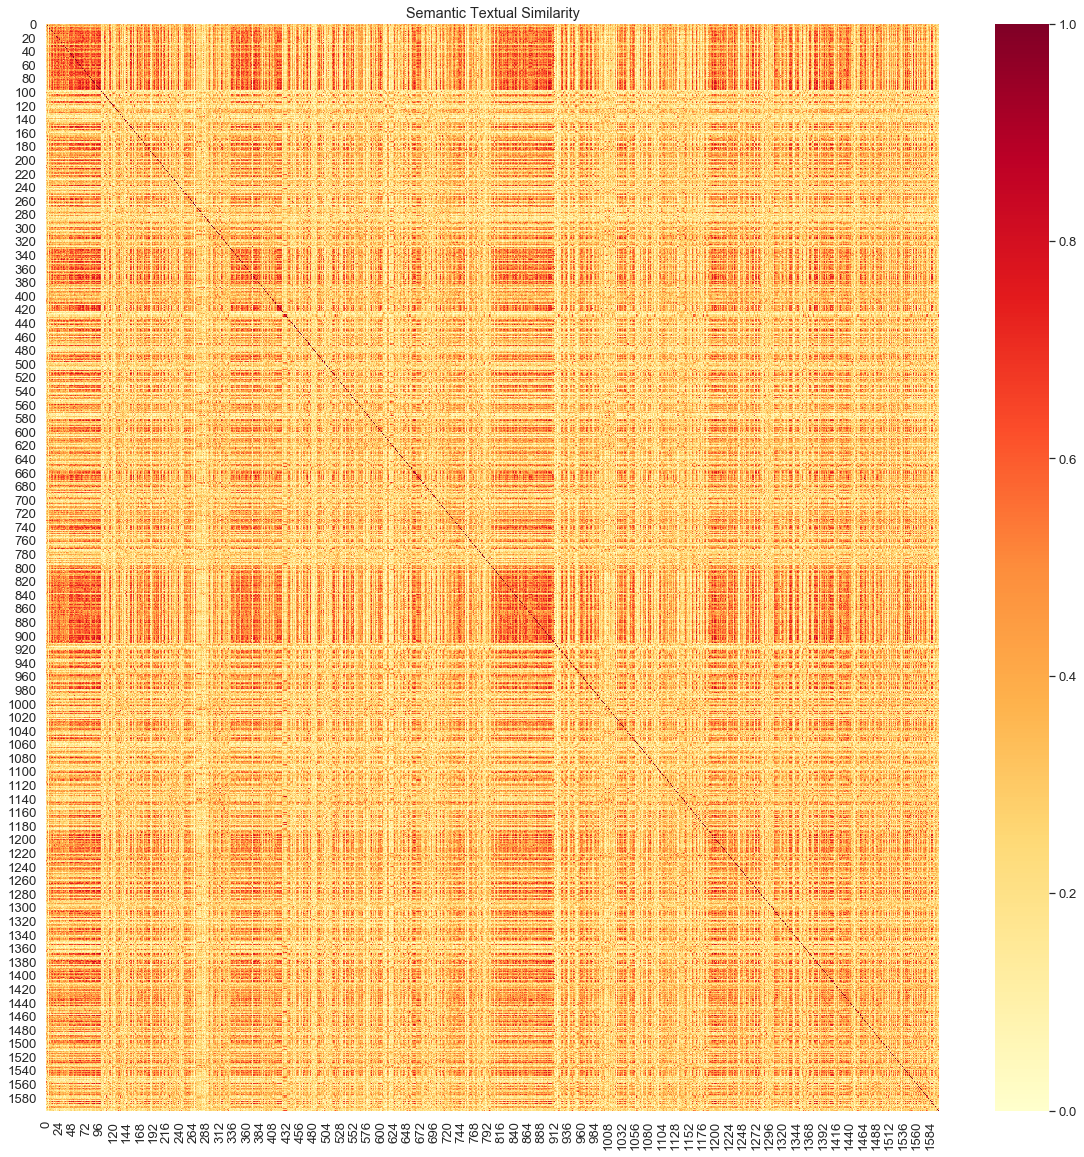

In [29]:
#sentences = dfpath['sentence'].tolist() # Only take the text column
# Sentences in order (0 first and then 1) = not gender generalizations first and gender generalizations after
tf.logging.set_verbosity(tf.logging.ERROR)  #Set the logging space for graph

similarity_input_placeholder = tf.placeholder(tf.string, shape=(None)) #Data type
similarity_message_encodings = embed(similarity_input_placeholder)     #Encoding using the USE embedding

with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    run_and_plot(session, similarity_input_placeholder, sentences, similarity_message_encodings)

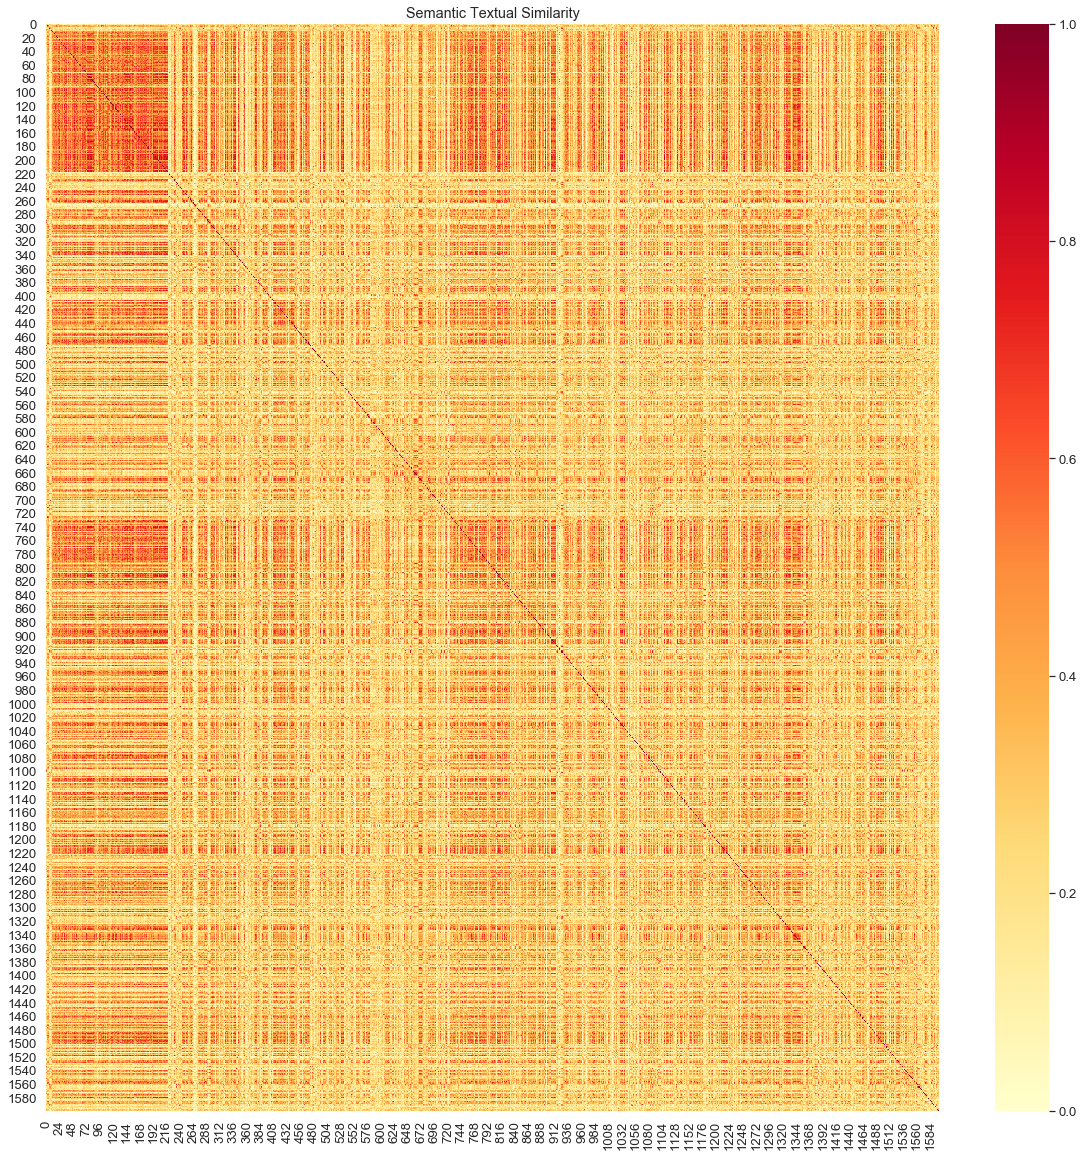

In [31]:
#Not in order (sentences)
sentences2 = dfpath2['sentence'].tolist() # Only take the text column

tf.logging.set_verbosity(tf.logging.ERROR)  #Set the logging space for graph

similarity_input_placeholder = tf.placeholder(tf.string, shape=(None)) #Data type
similarity_message_encodings = embed(similarity_input_placeholder)     #Encoding using the USE embedding

with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    run_and_plot(session, similarity_input_placeholder, sentences2, similarity_message_encodings)

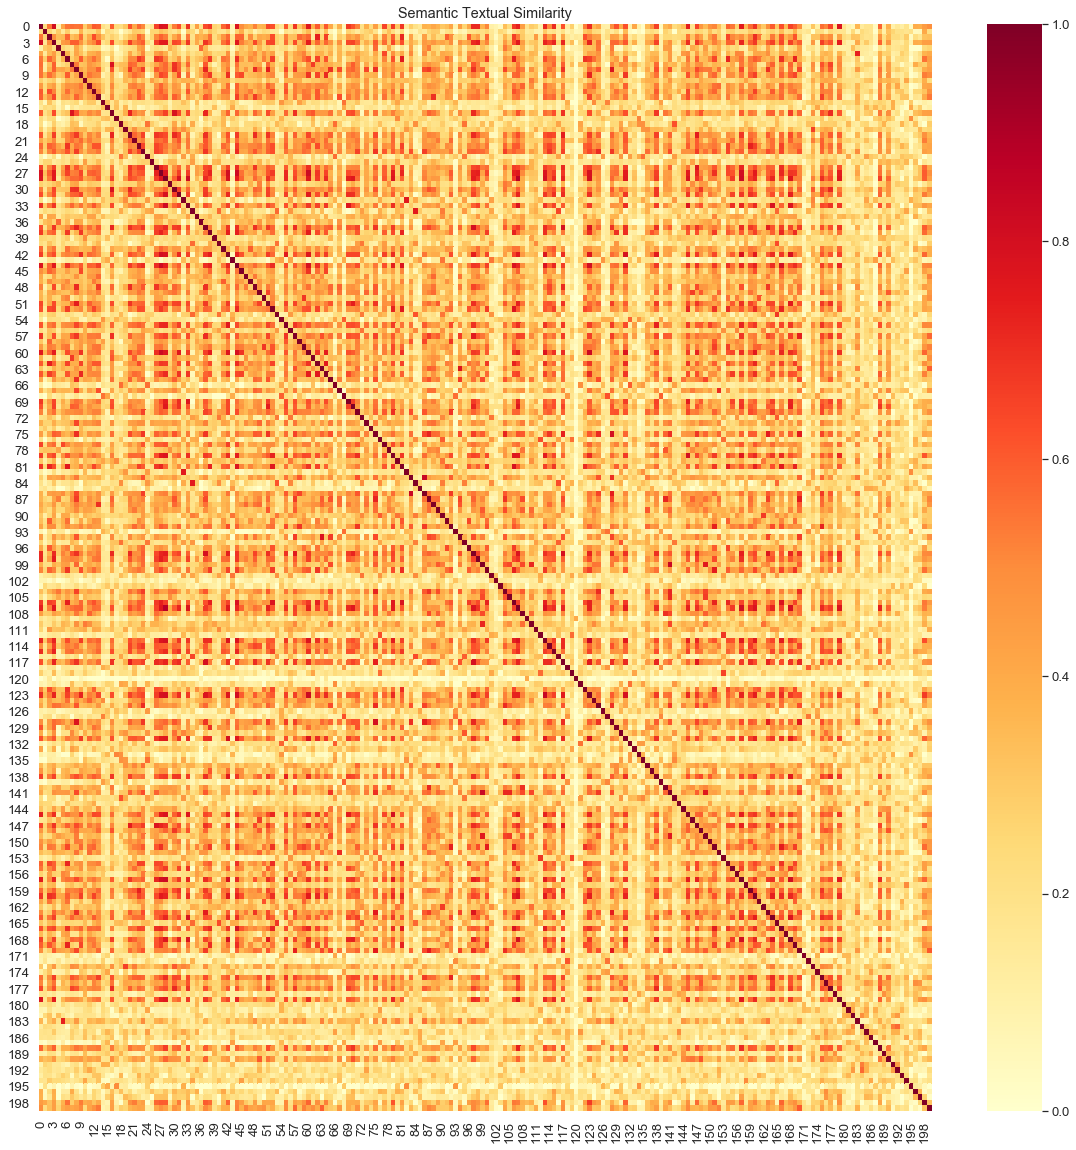

In [13]:
#Not in order (200 confident sentences)
sentences3 = df_path3['sentence'].tolist() # Only take the text column

tf.logging.set_verbosity(tf.logging.ERROR)  #Set the logging space for graph

similarity_input_placeholder = tf.placeholder(tf.string, shape=(None)) #Data type
similarity_message_encodings = embed(similarity_input_placeholder)     #Encoding using the USE embedding

with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    run_and_plot(session, similarity_input_placeholder, sentences3, similarity_message_encodings)

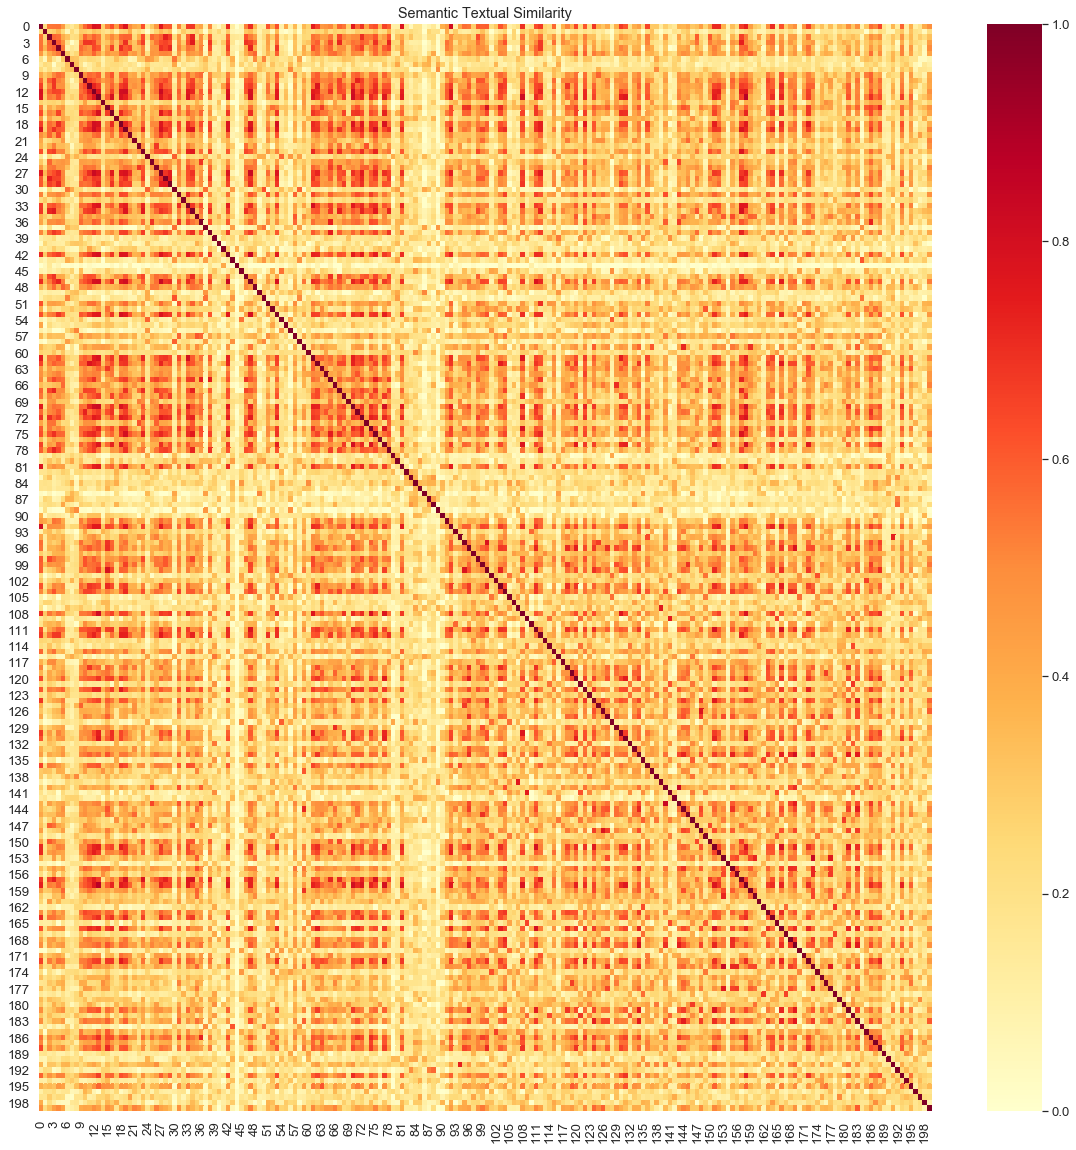

In [15]:
#In order (200 confident sentences)
sentences4 = df_path4['sentence'].tolist() # Only take the text column

tf.logging.set_verbosity(tf.logging.ERROR)  #Set the logging space for graph

similarity_input_placeholder = tf.placeholder(tf.string, shape=(None)) #Data type
similarity_message_encodings = embed(similarity_input_placeholder)     #Encoding using the USE embedding

with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    run_and_plot(session, similarity_input_placeholder, sentences4, similarity_message_encodings)